In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model,metrics

In [2]:
df=pd.read_csv(r'D:\Assignment\linear regression\delivery_time.csv')

In [53]:
pd.set_option("display.max_rows",500, "display.max_columns", 500)
print(df)

    Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5


In [4]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


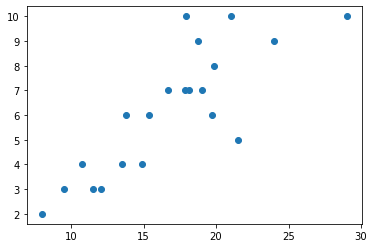

In [7]:
plt.scatter(df['Delivery Time'],df['Sorting Time'])

C:\Users\Hxtreme\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

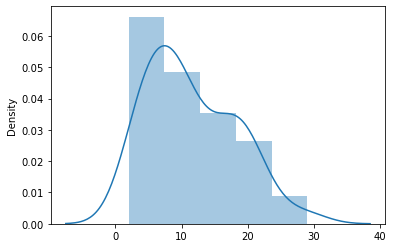

In [8]:
import seaborn as sns
sns.distplot(df) # this shows data is not a normal distribution

<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

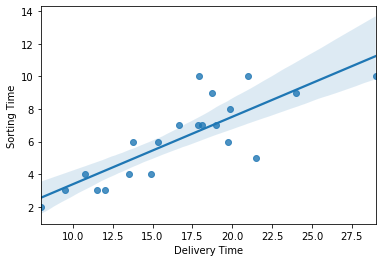

In [9]:
sns.regplot(x="Delivery Time",y="Sorting Time",data=df)

In [36]:
import statsmodels.formula.api as smf
model=smf.ols('DeliveryTime~SortingTime',data=df).fit()
model

In [37]:
model.rsquared , model.rsquared_adj

(0.77216134926874, 0.7601698413355158)

In [63]:
# Model Prediction
new_data=pd.Series([4,8,13,15])
data_pred=pd.DataFrame(new_data,columns=['SortingTime'])
model.predict(data_pred)

0     4.132076
1     6.522166
2     9.509777
3    10.704822
dtype: float64

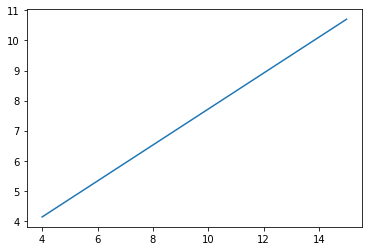

In [58]:
plt.plot(new_data,model.predict(data_pred))

In [39]:
# Sqrt transform
sqrt_trans= np.sqrt(df)
sqrt_trans

,Delivery Time,Sorting Time
0,4.582576,3.162278
1,3.674235,2.000000
2,4.444097,2.449490
3,4.898979,3.000000
4,5.385165,3.162278
5,3.917908,2.449490
6,4.358899,2.645751
7,3.082207,1.732051
8,4.230839,3.162278
9,4.330127,3.000000


C:\Users\Hxtreme\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

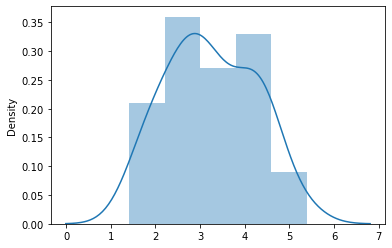

In [23]:
import seaborn as sns
sns.distplot(sqrt_trans)

In [24]:
DeliveryTime= sqrt_trans['Delivery Time']
SortingTime= sqrt_trans['Sorting Time']

In [25]:
#fitting a linear regression model
import statsmodels.formula.api as smf
sqrt_model= smf.ols("DeliveryTime ~ SortingTime",data= sqrt_trans).fit()
(sqrt_model.rsquared,sqrt_model.rsquared_adj)

(0.7292011987544664, 0.7149486302678594)

<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

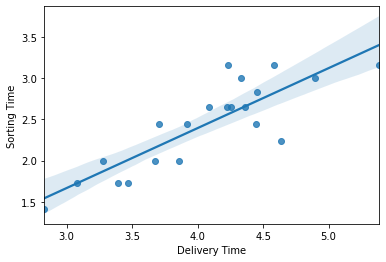

In [26]:
sns.regplot(x="Delivery Time",y="Sorting Time",data=sqrt_trans)

In [64]:
# Log transform
log_trans= np.log(df)
log_trans

,Delivery Time,Sorting Time
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585
5,2.731115,1.791759
6,2.944439,1.945910
7,2.251292,1.098612
8,2.884801,2.302585
9,2.931194,2.197225


C:\Users\Hxtreme\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

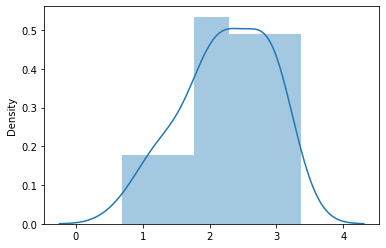

In [29]:
import seaborn as sns
sns.distplot(log_trans)

<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

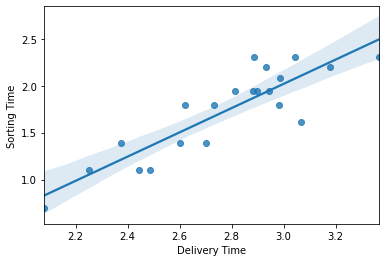

In [30]:
sns.regplot(x="Delivery Time",y="Sorting Time",data=log_trans)

In [65]:
# regression using log Transform
DeliveryTime= log_trans['Delivery Time']
SortingTime= log_trans['Sorting Time']
import statsmodels.formula.api as smf
log_model= smf.ols("DeliveryTime ~ SortingTime",data= log_trans).fit()
(log_model.rsquared,log_model.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

In [32]:
#prediction for newdata
newdata = pd.Series([10,12,14])

In [33]:
data_pred = pd.DataFrame(newdata,columns=['SortingTime'])

In [34]:
log_model.predict(data_pred)


0     7.717210
1     8.912255
2    10.107300
dtype: float64

In [35]:
# log Transform gives more accuracy 77%.